<a href="https://colab.research.google.com/github/deba-roy/World_Bank_Global_Education_Analysis/blob/main/DEBARTHA_ROY_CHOWDHURY_Capstone_Project_1_World_Bank_Global_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

# World Bank Global Education Analysis
   **_Introduction:_** 
  
  The World Bank EdStats (Education Statistics) portal is a comprehensive data and analysis source for key topics in education such as access, completion, learning, expenditures, policy, and equity. Data sources include administrative country data from international learning assessments (PISA, TIMSS, PIRLS, PIAAC, and EGRA) and three regional learning assessments (SACMEQ, PASEC, LLECE); World Bank databases. It includes World Bank Education Projects Database classified by activities, components, and sub-sectors of all World Bank Education Projects since 1970.

## 1. Downloading and Importing the necessary files and tools

In [1]:
# Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the given dataset from the csv files

In [4]:
df_stats_country_series = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Python for Data science/Capstone Project/Capstone Project 1: World Bank Global Education Analysis/EdStatsCountry-Series.csv')
df_stats_country = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Python for Data science/Capstone Project/Capstone Project 1: World Bank Global Education Analysis/EdStatsCountry.csv')
df_stats_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Python for Data science/Capstone Project/Capstone Project 1: World Bank Global Education Analysis/EdStatsData.csv')
df_stats_footnote = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Python for Data science/Capstone Project/Capstone Project 1: World Bank Global Education Analysis/EdStatsFootNote.csv')
df_stats_series = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Python for Data science/Capstone Project/Capstone Project 1: World Bank Global Education Analysis/EdStatsSeries.csv')

### Primary insights on each of the given datasets:
**_About the dataset:_** (source, contents, usefulness) 

*   df_stats_country_series(EdStatsCountry-Series.csv) - this list contains data sources and indicators respective to each countries. 
*   df_stats_country(EdStatsCountry.csv) - this list contains all countries and the other features related to the countries like region, income group specific to them.
*   df_stats_data (EdStatsData.csv) - it contains list of indicators(about 3665 of them), projections from the year 2020 to 2100 and measurement value for each indicator in the year range 1970 to 2017.
*   df_stats_footnote (EdStatsFootnote.csv) - it contains uncertainty and estimations for the years 
*   df_stats_series = (EdStatsSeries.csv) - containing list of the indicators and the definition of each of those.




## 2. Data Preparation and cleaning
  - load files using pandas
  - look for information about data and columns
  - fix any missing or incorrect values

#Analysis of EdStatsCountry-Series.csv

In [5]:
df_stats_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
df_stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


### This csv file contains unnamed: 3 that we have to remove

In [7]:
# code to remove the column unnamed: 3
New_Country_Series = df_stats_country_series.drop('Unnamed: 3',axis=1)
New_Country_Series


,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


In [8]:
New_Country_Series.describe()

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


#Analysis of EdStatsCountry.csv

In [9]:
df_stats_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [10]:
df_stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### This csv file contains unnamed: 31 that we have to remove

In [11]:
# code to remove the column unnamed: 31
New_Country = df_stats_country.drop('Unnamed: 31',axis=1)
New_Country

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002


#Analysis of EdStatsData.csv

In [12]:
df_stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### This csv file contains unnamed: 69 that we have to remove

In [14]:
# code to remove the column unnamed: 69
New_Stats_Data = df_stats_data.drop('Unnamed: 69',axis=1)
New_Stats_Data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
New_Stats_Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [16]:
New_Stats_Data['Indicator Name'].nunique()

3665

In [ ]:
New_Stats_Data['Country Name'].nunique()

242

### From this it can be inferred that the file contains 242 unique countries and 3665 unique indicator names corresponding to the countries

In [17]:
# Taking Descriptive Statistics of all the main columns i.e. Country name, Country code, Indicator name, Indicator code

New_Stats_Data[['Country Name','Country Code','Indicator Name','Indicator Code']].describe()



,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


# Analysis of EdStatsFootnote.csv

In [18]:
df_stats_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [19]:
df_stats_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


### This csv file contains the column unnamed: 4 that have zero non-null values that have to be removed and the elements of the column "Year" contains the string YR that have to be stripped off

In [20]:
# code to remove the column unnamed: 4
New_Stats_Footnote = df_stats_footnote.drop('Unnamed: 4',axis=1)
New_Stats_Footnote['Year']=New_Stats_Footnote['Year'].str.lstrip('YR')
New_Stats_Footnote

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,2017,5-year average value between 0s and 5s


# Analysis of EdStatsSeries.csv

In [21]:
df_stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Dropping all the columns that have null values which are insignificant in terms of data analysis

In [23]:
# code to remove the columns that include null values
New_Stats_Series =df_stats_series.drop(['Unnamed: 20','License Type','Related indicators','Other web links','Notes from original source','Unit of measure'],axis=1)
New_Stats_Series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,Secondary,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN


## 3. Exploratory Analysis and Visualization

  

### The primary analysis of the datasets reveals that the file **EdStatsData.csv** contains list of indicators and the names of each country, their measurement value for each indicator ranging from years 1970 to 2017 and projections from 2020 to 2100. So as the main dataset, this csv file will be used mostly.

**Lets take a look at the columns of EdStatsCountry.csv**

In [24]:
df_stats_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [25]:
# Getting unique income groups
df_stats_country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

## Categorising the countries based on the income group feature:

In [26]:
#Countries with High income
H_I_countries = df_stats_country[(df_stats_country['Income Group'] == 'High income: OECD')|(df_stats_country['Income Group'] == 'High income: nonOECD')]['Short Name'].values
H_I_countries

array(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'The Bahamas',
       'Bermuda', 'Barbados', 'Brunei', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'Faeroe Islands', 'United Kingdom',
       'Equatorial Guinea', 'Greece', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Croatia', 'Isle of Man', 'Ireland',
       'Iceland', 'Israel', 'Italy', 'Japan', 'St. Kitts and Nevis',
       'Korea', 'Kuwait', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco',
       'Malta', 'Northern Mariana Islands', 'New Caledonia',
       'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Poland',
       'Puerto Rico', 'Portugal', 'French Polynesia', 'Qatar', 'Russia',
       'Saudi Arabia', 'Singapore', 'San Marino'

In [27]:
#Countries with upper middle income
U_M_I_countries = df_stats_country[df_stats_country['Income Group'] == 'Upper middle income']['Short Name'].values
U_M_I_countries

array(['Angola', 'Albania', 'Argentina', 'American Samoa', 'Azerbaijan',
       'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Brazil', 'Botswana', 'China', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Fiji',
       'Gabon', 'Grenada', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Lebanon', 'Libya', 'St. Lucia', 'Maldives',
       'Mexico', 'Marshall Islands', 'Macedonia', 'Montenegro',
       'Mauritius', 'Malaysia', 'Namibia', 'Panama', 'Peru', 'Palau',
       'Romania', 'Serbia', 'Suriname', 'Seychelles', 'Thailand',
       'Turkmenistan', 'Tonga', 'Tunisia', 'Turkey', 'Tuvalu',
       'St. Vincent and the Grenadines', 'Venezuela', 'South Africa'],
      dtype=object)

In [28]:
#Countries with lower middle income
L_M_I_countries = df_stats_country[df_stats_country['Income Group'] == 'Lower middle income']['Short Name'].values
L_M_I_countries

array(['Armenia', 'Bolivia', 'Bhutan', "Côte d'Ivoire", 'Cameroon',
       'Congo', 'Cabo Verde', 'Djibouti', 'Egypt', 'Micronesia',
       'Georgia', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia',
       'India', 'Kyrgyz Republic', 'Kiribati', 'Lao PDR', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Moldova', 'Mongolia', 'Mauritania',
       'Nigeria', 'Nicaragua', 'Pakistan', 'Philippines',
       'Papua New Guinea', 'Paraguay', 'West Bank and Gaza', 'Sudan',
       'Senegal', 'Solomon Islands', 'El Salvador', 'South Sudan',
       'São Tomé and Principe', 'Swaziland', 'Syrian Arab Republic',
       'Timor-Leste', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Vanuatu',
       'Samoa', 'Kosovo', 'Yemen', 'Zambia'], dtype=object)

In [29]:
#Countries with low income
L_I_countries = df_stats_country[df_stats_country['Income Group'] == 'Low income']['Short Name'].values
L_I_countries

array(['Afghanistan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Central African Republic', 'Dem. Rep. Congo', 'Comoros',
       'Eritrea', 'Ethiopia', 'Guinea', 'The Gambia', 'Guinea-Bissau',
       'Haiti', 'Kenya', 'Cambodia', 'Liberia', 'Madagascar', 'Mali',
       'Myanmar', 'Mozambique', 'Malawi', 'Niger', 'Nepal',
       "Dem. People's Rep. Korea", 'Rwanda', 'Sierra Leone', 'Somalia',
       'Chad', 'Togo', 'Tajikistan', 'Tanzania', 'Uganda', 'Zimbabwe'],
      dtype=object)

In [30]:
# Expenditure trends on education across countries

def income_group_plot(param,label):                                                             # Creating a function to plot govt expenditure vs each education level
  df_stats_income = df_stats_country[['Short Name','Income Group']].merge(df_stats_data,how='inner',left_on='Short Name',right_on='Country Name') # inner joining short name and income group on df_stats_data
  cols = []
  cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code','Income Group']) # extending the income group to cols empty list
  check_cols = list(np.arange(1980,2016,1).astype(str))                                         # the values that are needed to analysis, taking that in a list
  cols.extend(check_cols)                                                                       # extending the check_cols into cols
  df_stats_income = df_stats_income[df_stats_income['Indicator Name']==param].loc[:,cols]       # taking the indicator name as parameter
  df_stats_income_group = df_stats_income.groupby('Income Group').mean(numeric_only=True).reset_index() # taking mean of income group values and reseting index to start from 1
  for i in range(5):                                                                            # taking 5 loops to analyse and plot each income group
    cols = df_stats_income_group.columns.values[1:]
    values = df_stats_income_group.iloc[i].values[1:]
    plt.rcParams['figure.figsize'] = (20,7)
    plt.plot(cols,values,'*-', label = df_stats_income_group.iloc[i,0],linewidth=5,markersize=10)
    plt.xlabel('Years ---->')
    plt.ylabel(label)
    plt.xticks(rotation=45)
    plt.title(param + ' vs ' + label)
    plt.legend()

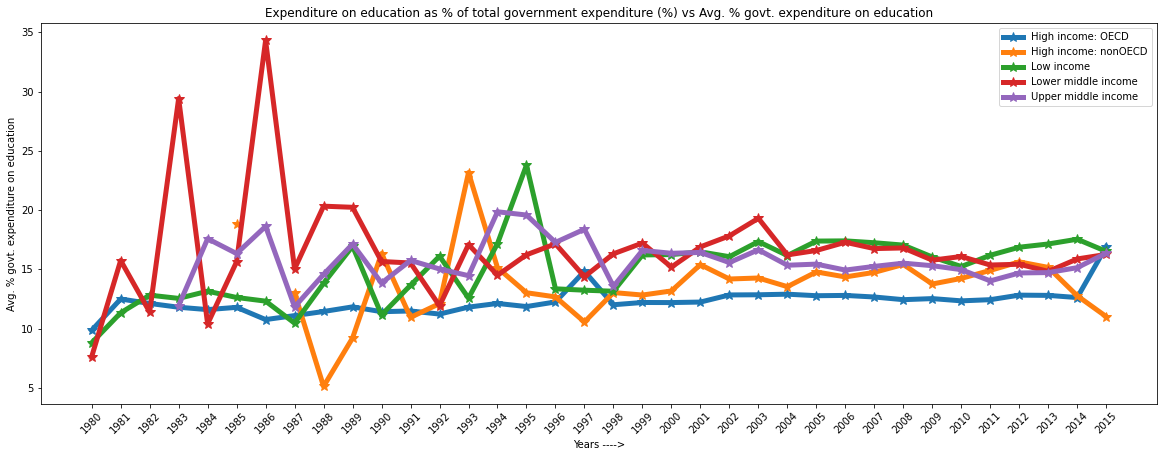

In [31]:
# Plotting income group

income_group_plot('Expenditure on education as % of total government expenditure (%)','Avg. % govt. expenditure on education')


From this graph we can conclude:
 
  1. All expenditures among the income groups from the year 1998 onwards have become stable.
  2. There are peaks in the years 1983, 1986 that signifies government expenditures in those years mainly focused on lower middle income group.

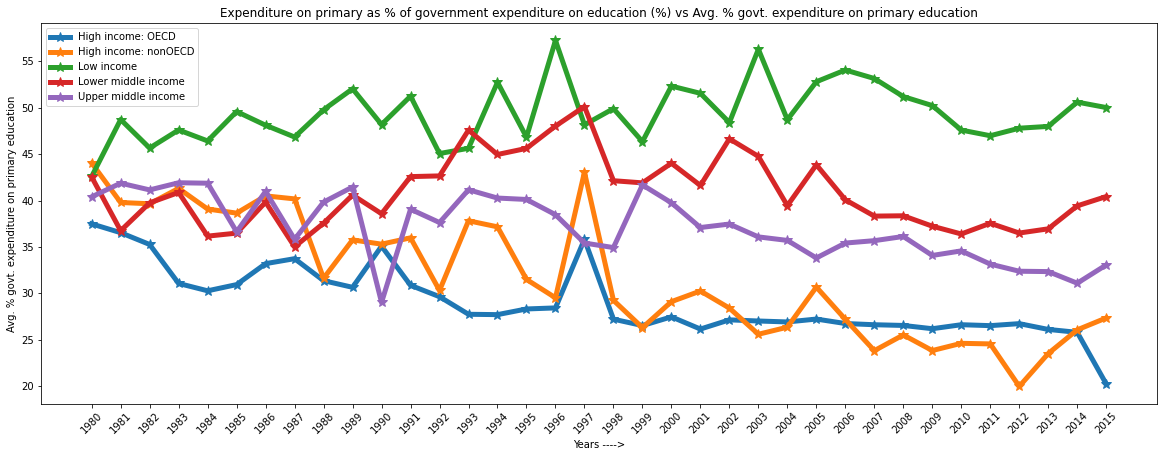

In [32]:
income_group_plot('Expenditure on primary as % of government expenditure on education (%)','Avg. % govt. expenditure on primary education')


From this graph we can conclude:
 
  1. Most stable government expenditure in the primary education throughout the years has been observed in the low income group.
  2. The sharpest decrease in expenditure has been observed in the high income non-OECD group.

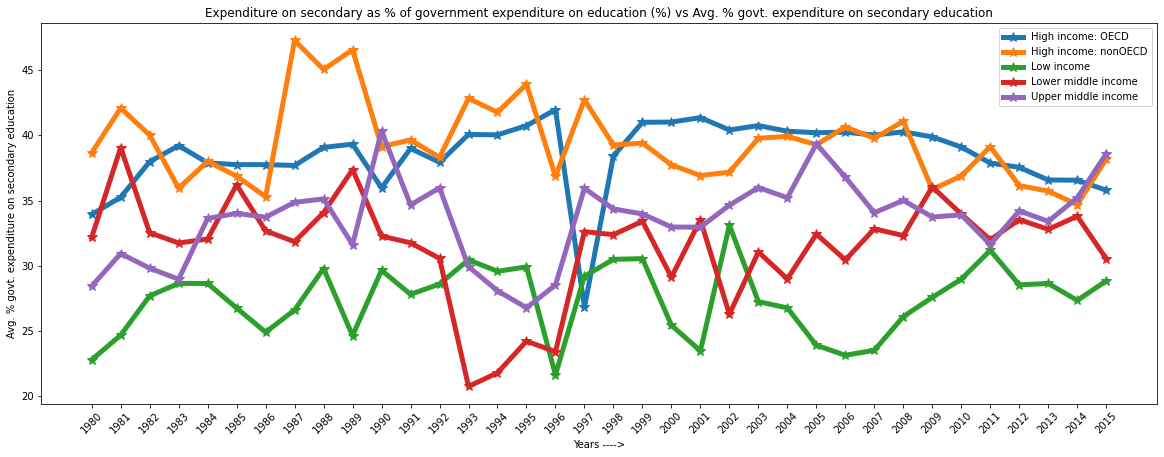

In [33]:
income_group_plot('Expenditure on secondary as % of government expenditure on education (%)','Avg. % govt. expenditure on secondary education')


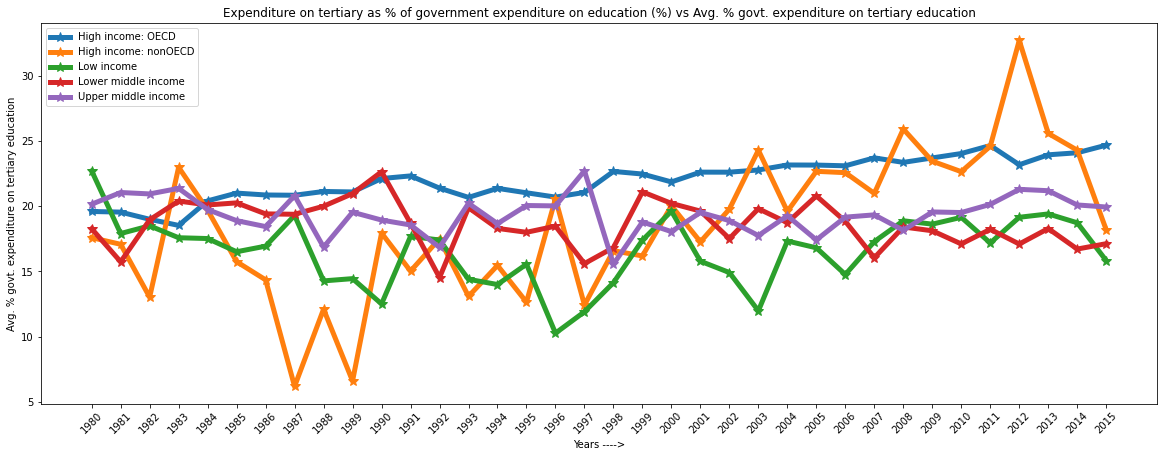

In [34]:
income_group_plot('Expenditure on tertiary as % of government expenditure on education (%)','Avg. % govt. expenditure on tertiary education')


From this graph we can conclude:
   
*  Significant growth in tertiary education sector has been observed in the high income non-OECD group.
*  Decrease in expenditure has been observed in the low income group througout the year.



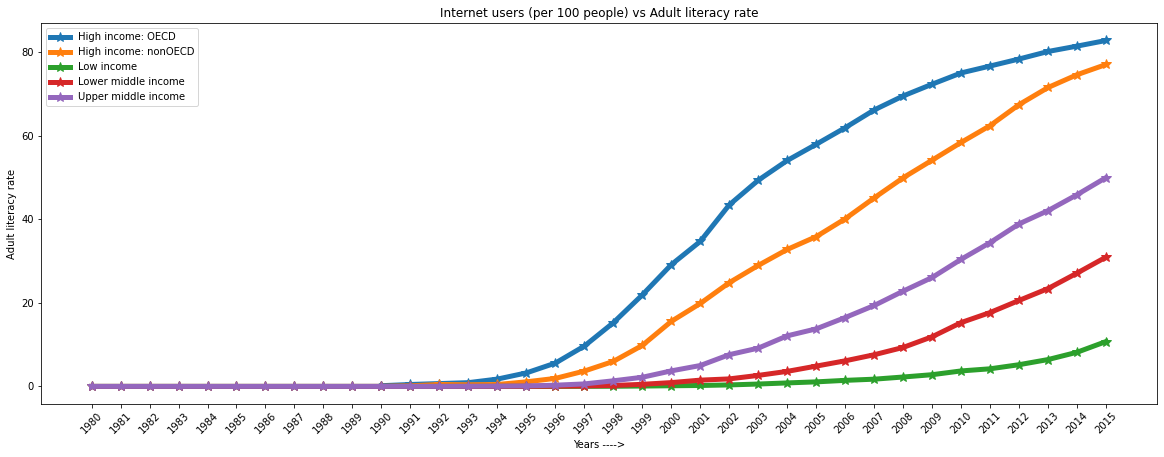

In [35]:
income_group_plot('Internet users (per 100 people)', 'Adult literacy rate')

From this graph we can conclude:
 
  1. Starting of growth in literacy rate has been observed from the year 1995.
  2. High income OECD groups showed highest growth in literacy rate.

## Analysing the values to find the year that has most data available.

In [36]:
# Years that have the least data available
years = df_stats_data.iloc[:, 4:-1]
Missing_percentage = years.isnull().sum() * 100 / len(years)
Missing_percentage =  pd.DataFrame({'years': years.columns,
                                 'percent_missing': Missing_percentage})

Missing_percentage.T

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
years,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
percent_missing,91.849639,95.993258,95.984012,95.992356,95.971497,90.156382,95.773849,95.763589,95.763364,95.849842,...,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067,94.20067


In [37]:
# total no. of years in the dataset
len(years)

886930

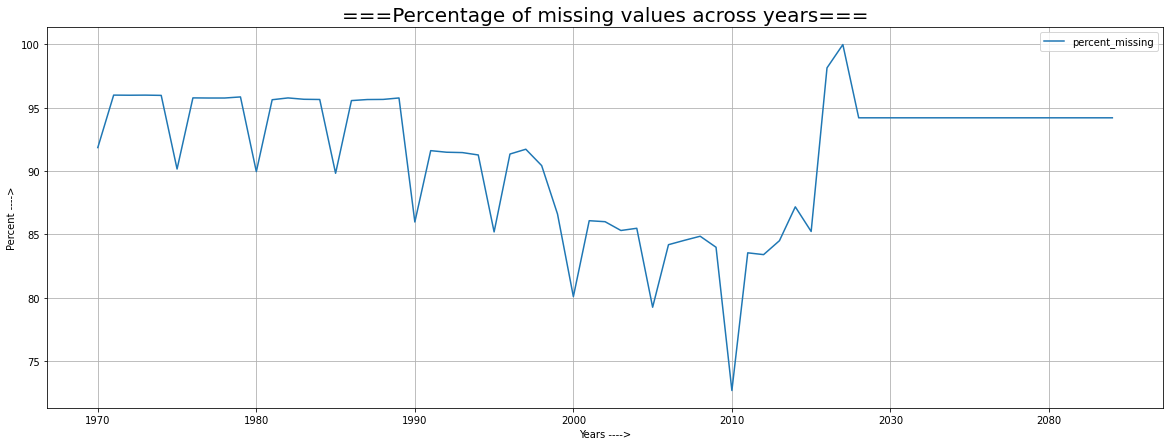

In [38]:
# plotting the percentage of missing values

Missing_percentage.plot(figsize=(20,7), grid=True)
plt.title('===Percentage of missing values across years===', fontsize=20)
plt.xlabel('Years ---->')
plt.ylabel('Percent ---->')
plt.show()

1. From 2000 to 2015 the null values appears to be least
2. Most of the data is available in the year range 2000 to 2010
3. Post the year 2020, most of the data are missing

## On the basis of Country Indicator plotting the comparison among the Developed and the Developing countries:

In [40]:
from numpy import random 

def Country_indicator(indicator,year,ci1=None,ci2=None,ci3=None,ci4=None,ci5=None,ci6=None):
  ci = [ci1,ci2,ci3,ci4,ci5,ci6]
  country = ['Country Name']
  country.extend(list(np.arange(year,2011,1).astype(str)))
  unique_indicator_countries = New_Stats_Data[New_Stats_Data['Indicator Name']==indicator].loc[:,country].groupby('Country Name').mean().reset_index()  # Comments for each step explanation must be added!
  if ci1 or ci2 or ci3 or ci4 or ci5 or ci6!=None:
    for j in range(6):
      if ci[int(j)]!=None:
        unique_indicator_countries_country=unique_indicator_countries[unique_indicator_countries['Country Name'] == ci[int(j)]]
        xlab = unique_indicator_countries_country.columns[1:]
        ylab = unique_indicator_countries_country.iloc[0][1:]
        d = len(unique_indicator_countries_country.columns)-1
        plt.scatter(xlab,ylab,label=unique_indicator_countries_country.iloc[0,0],alpha=0.5,cmap='winter',s=random.randint(100,size=(d)))
        plt.xlabel('Year ---->',size=20)
        plt.ylabel(indicator,size=12)
        plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
        plt.xticks(rotation = 45)
        plt.rcParams['figure.figsize'] = (15,5)
        plt.title(indicator +' vs Years')
  else:
    for i in range(10):
      xlab = unique_indicator_countries.columns[1:]
      ylab = unique_indicator_countries.iloc[i][1:]
      d = len(unique_indicator_countries.columns)-1
      plt.scatter(xlab,ylab,label=unique_indicator_countries.iloc[i,0],alpha=0.5,cmap='winter',s=random.randint(100,size=(d)))
      plt.xlabel('Year ---->',size=20)
      plt.ylabel(indicator +' Rate ---->',size=15)
      plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
      plt.xticks(rotation=45)
      plt.rcParams['figure.figsize'] = (15,5)
      plt.title(indicator +' vs Years')

In [41]:
pd.DataFrame(New_Stats_Data['Indicator Name'].unique())

,0
0,"Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex..."
...,...
3660,"Youth illiterate population, 15-24 years, male..."
3661,"Youth literacy rate, population 15-24 years, b..."
3662,"Youth literacy rate, population 15-24 years, f..."
3663,"Youth literacy rate, population 15-24 years, g..."


In [42]:
pd.DataFrame(New_Stats_Data['Country Name'].unique())

,0
0,Arab World
1,East Asia & Pacific
2,East Asia & Pacific (excluding high income)
3,Euro area
4,Europe & Central Asia
...,...
237,Virgin Islands (U.S.)
238,West Bank and Gaza
239,"Yemen, Rep."
240,Zambia


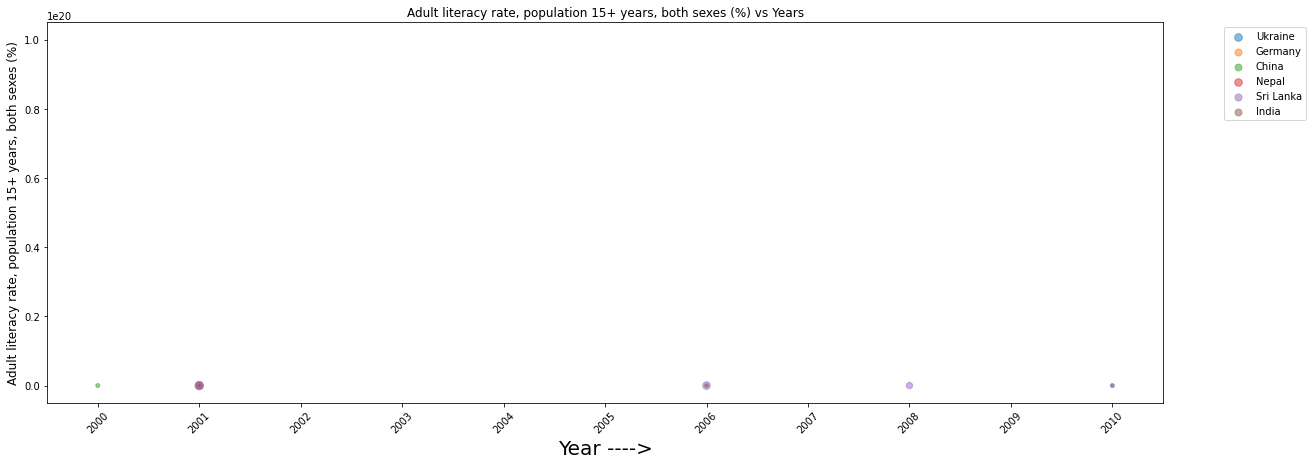

In [43]:
Country_indicator('Adult literacy rate, population 15+ years, both sexes (%)',2000,'Ukraine','Germany','China','Nepal','Sri Lanka','India')

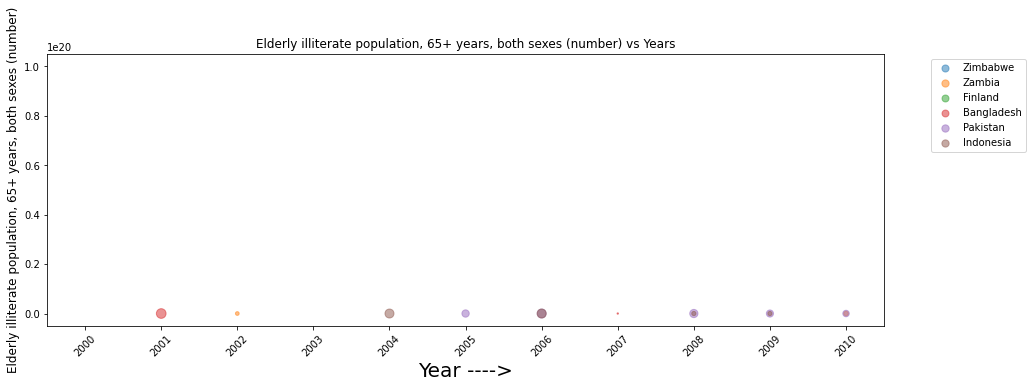

In [44]:
Country_indicator('Elderly illiterate population, 65+ years, both sexes (number)',2000,'Zimbabwe','Zambia','Finland','Bangladesh','Pakistan','Indonesia')

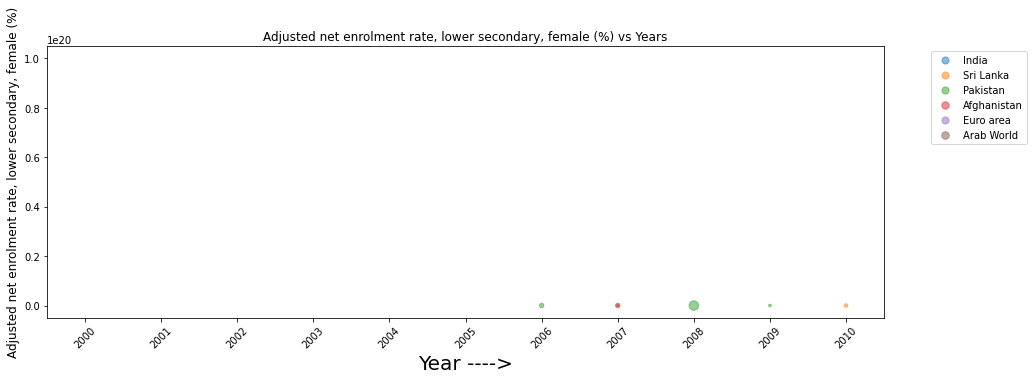

In [45]:
Country_indicator('Adjusted net enrolment rate, lower secondary, female (%)',2000,'India','Sri Lanka','Pakistan', 'Afghanistan', 'Euro area', 'Arab World')


## 5. Summary & Conclusion

### Insights from the visualization plots:
  - The file EdStatsData.csv contains 242 unique countries and 3665 unique indicator names corresponding to the countries.
  - The measurement value for each indicator ranging from years 1970 to 2017 and projections from 2020 to 2100. 
  - All expenditures among the income groups from the year 1998 onwards have become stable.
  - Government expenditures in the years 1983 & 1986 mainly focused on lower middle income group.
  - Most stable government expenditure in the primary education throughout the years has been observed in the low income group.
  - Most of the data is available in the year range 2000 to 2010. Post the year 2020, most of the data are missing and only projections are observed.
  - Significant growth in tertiary education sector has been observed in the high income non-OECD group.
  - Starting of growth in literacy rate has been observed from the year 1995.
  - High income OECD groups showed highest growth in literacy rate.


  ### This dataset can also be used to measure compensation of teachers, if we are to advise the education ministry on management of funds. Learning Assessment Indicators for Mathematics and Science can be used to predict populations that tend to have a knack for technology.

